# Exploratory Data Analysis

----
### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading Data

### client_data.csv
● id = client company identifier

● activity_new = category of the company’s activity

● channel_sales = code of the sales channel

● cons_12m = electricity consumption of the past 12 months

● cons_gas_12m = gas consumption of the past 12 months

● cons_last_month = electricity consumption of the last month

● date_activ = date of activation of the contract

● date_end = registered date of the end of the contract

● date_modif_prod = date of the last modification of the product

● date_renewal = date of the next contract renewal

● forecast_cons_12m = forecasted electricity consumption for next 12 months

● forecast_cons_year = forecasted electricity consumption for the next calendar year

● forecast_discount_energy = forecasted value of current discount

● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

● has_gas = indicated if client is also a gas client

● imp_cons = current paid consumption

● margin_gross_pow_ele = gross margin on power subscription

● margin_net_pow_ele = net margin on power subscription

● nb_prod_act = number of active products and services

● net_margin = total net margin

● num_years_antig = antiquity of the client (in number of years)

● origin_up = code of the electricity campaign the customer first subscribed to

● pow_max = subscribed power

● churn = has the client churned over the next 3 months


#### price_data.csv
● id = client company identifier

● price_date = reference date

● price_off_peak_var = price of energy for the 1st period (off peak)

● price_peak_var = price of energy for the 2nd period (peak)

● price_mid_peak_var = price of energy for the 3rd period (mid peak)

● price_off_peak_fix = price of power for the 1st period (off peak)

● price_peak_fix = price of power for the 2nd period (peak)

● price_mid_peak_fix = price of power for the 3rd period (mid peak)

In [2]:
client = pd.read_csv(r"C:\Users\Kathleen\Downloads\client_data (1).csv")
price = pd. read_csv(r"C:\Users\Kathleen\Downloads\price_data (1).csv")

### 3.Understanding our Data

In [3]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [43]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [4]:

pd.set_option('display.max_columns', None)

In [5]:
client.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0,0.0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751,0.0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,0,0.0,15.85,0.145711,0.000000,44.311378,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,2188,0.0,130.43,0.115761,0.099419,40.606701,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


We can tell there are some categorical features that will require encoding for modelling

In [ ]:
price.head(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


The price dataset looks good overall

In [6]:
data = pd.merge(client,price,on='id',how='inner')

In [7]:
data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,1.751490e+05,1.751490e+05,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.00000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000,175149.000000
mean,1.592606e+05,2.808072e+04,16095.518404,1868.343884,1399.782380,0.967028,63.074649,0.137287,0.050487,43.130229,152.789831,24.566829,24.564223,1.29230,189.245305,4.998276,18.134896,0.097077,0.142331,0.052059,0.028270,42.929009,9.458953,6.096434
std,5.735413e+05,1.629400e+05,64376.741908,2387.560169,3248.331276,5.109025,66.143996,0.024625,0.049036,4.486779,341.426992,20.234481,20.233588,0.70978,311.846765,1.611801,13.535809,0.296064,0.023340,0.050286,0.036065,4.620531,12.133202,7.822250
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,1.000000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.00000,50.710000,4.000000,12.500000,0.000000,0.126595,0.000000,0.000000,40.728885,0.000000,0.000000
50%,1.411500e+04,0.000000e+00,792.000000,1112.610000,314.000000,0.000000,18.790000,0.143166,0.084138,44.311378,37.390000,21.640000,21.640000,1.00000,112.500000,5.000000,13.856000,0.000000,0.146788,0.084213,0.000000,44.266930,0.000000,0.000000
75%,4.076300e+04,0.000000e+00,3383.000000,2400.350000,1745.000000,0.000000,131.030000,0.146348,0.098837,44.311378,193.990000,29.880000,29.880000,1.00000,243.000000,6.000000,19.180000,0.000000,0.151635,0.102114,0.072900,44.444710,24.339581,16.226389
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.00000,24570.650000,13.000000,320.000000,1.000000,0.280700,0.229788,0.114102,59.444710,36.490689,17.458221


From the percentiles, we can tell that our data is highly skewed

c:\Users\Kathleen\Desktop\ML1\ML1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


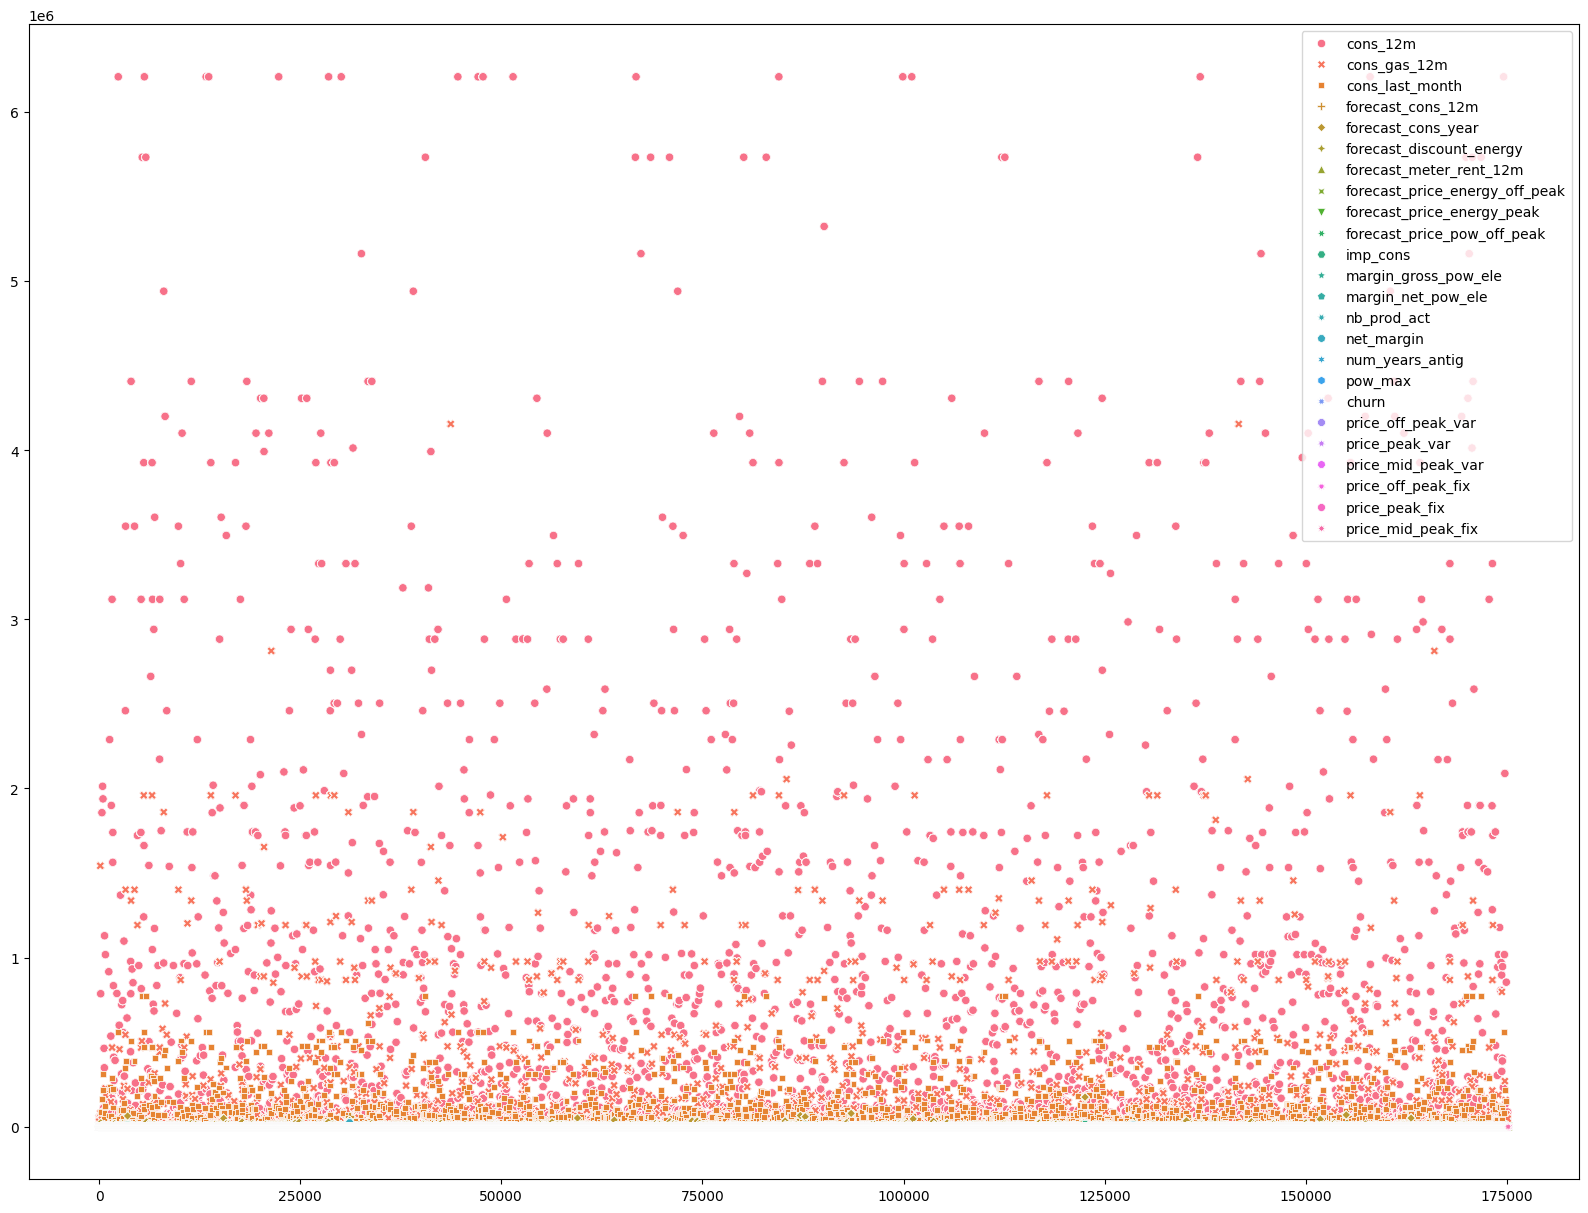

In [8]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=data)
plt.show()

### 4. Data Visualization

#### CHURN

In [45]:
churn = data[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100

In [50]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

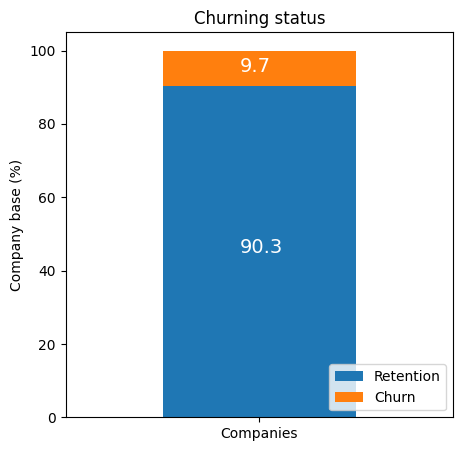

In [51]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

PowerCo has a churn rate of 9.7% and a retention of 90.3% in total

 ##### SALES CHANNEL

In [9]:
data['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: count, dtype: int64

In [10]:
data['churn'].value_counts()

churn
0    158146
1     17003
Name: count, dtype: int64

In [61]:
churn_rate

,channel_sales,churn
0,MISSING,44684
1,epumfxlbckeskwekxbiuasklxalciiuu,36
2,ewpakwlliwisiwduibdlfmalxowmwpci,10712
3,fixdbufsefwooaasfcxdxadsiekoceaa,24
4,foosdfpfkusacimwkcsosbicdxkicaua,80971
5,lmkebamcaaclubfxadlmueccxoimlema,22105
6,sddiedcslfslkckwlfkdpoeeailfpeds,131
7,usilxuppasemubllopkaafesmlibmsdf,16486


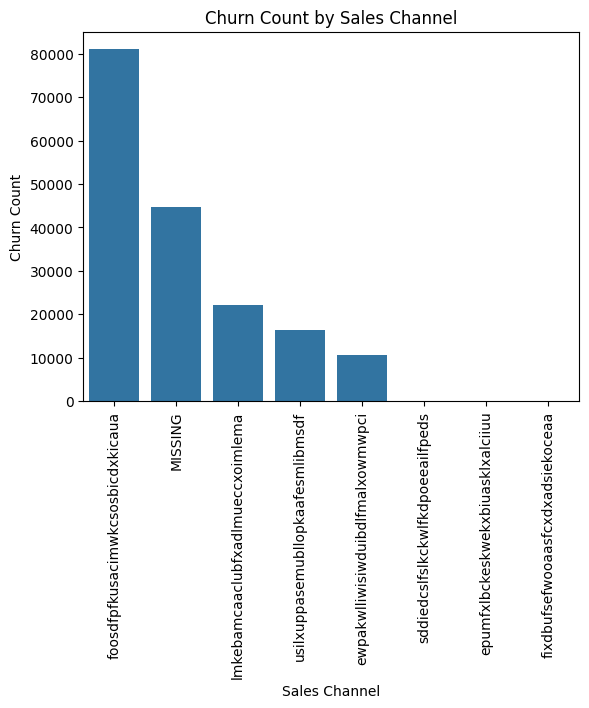

In [67]:

# Calculate the churn rate per sales channel
churn_rate = data.groupby('channel_sales')['churn'].count().reset_index().sort_values(ascending=False,by='churn')
# Plotting the churn rate
sns.barplot(x='channel_sales', y='churn', data=churn_rate)
plt.title('Churn Count by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Churn Count')
plt.xticks(rotation=90)
plt.show()


In [55]:
channel = data[['id', 'channel_sales', 'churn']]
channelsales = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)


In [56]:
channelsales

churn,0,1
channel_sales,,
MISSING,41290.0,3394.0
epumfxlbckeskwekxbiuasklxalciiuu,36.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,9813.0,899.0
fixdbufsefwooaasfcxdxadsiekoceaa,24.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,71149.0,9822.0
lmkebamcaaclubfxadlmueccxoimlema,20871.0,1234.0
sddiedcslfslkckwlfkdpoeeailfpeds,131.0,0.0
usilxuppasemubllopkaafesmlibmsdf,14832.0,1654.0


In [58]:
channel_churn = (channelsales.div(channelsales.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=True)
channel_churn

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000
lmkebamcaaclubfxadlmueccxoimlema,94.417553,5.582447
MISSING,92.404440,7.595560
ewpakwlliwisiwduibdlfmalxowmwpci,91.607543,8.392457
usilxuppasemubllopkaafesmlibmsdf,89.967245,10.032755
foosdfpfkusacimwkcsosbicdxkicaua,87.869731,12.130269


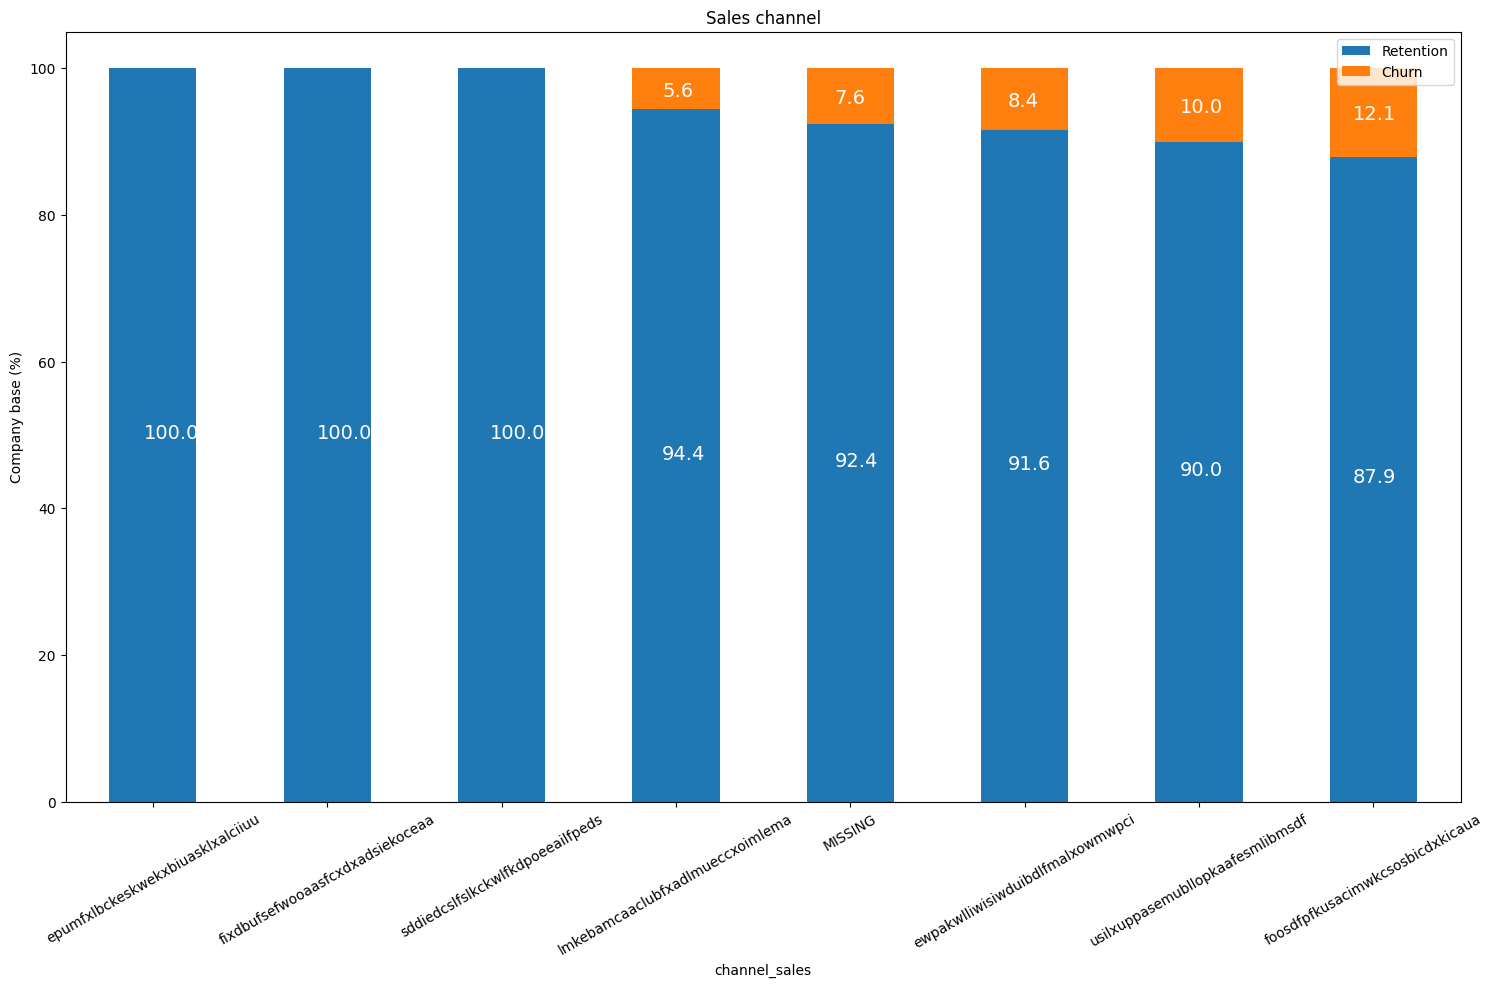

In [68]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

The most used sales channel in the dataset has the highest churn rate

##### PRICE TRENDS

In [12]:
data['price_date'] = pd.to_datetime(data['price_date'])


In [13]:
data['price_date'].value_counts()

price_date
2015-12-01    14604
2015-08-01    14604
2015-07-01    14601
2015-11-01    14599
2015-10-01    14597
2015-06-01    14596
2015-02-01    14596
2015-09-01    14593
2015-04-01    14592
2015-03-01    14591
2015-05-01    14590
2015-01-01    14586
Name: count, dtype: int64

In [14]:
data['price_date'] = data['price_date'].dt.month

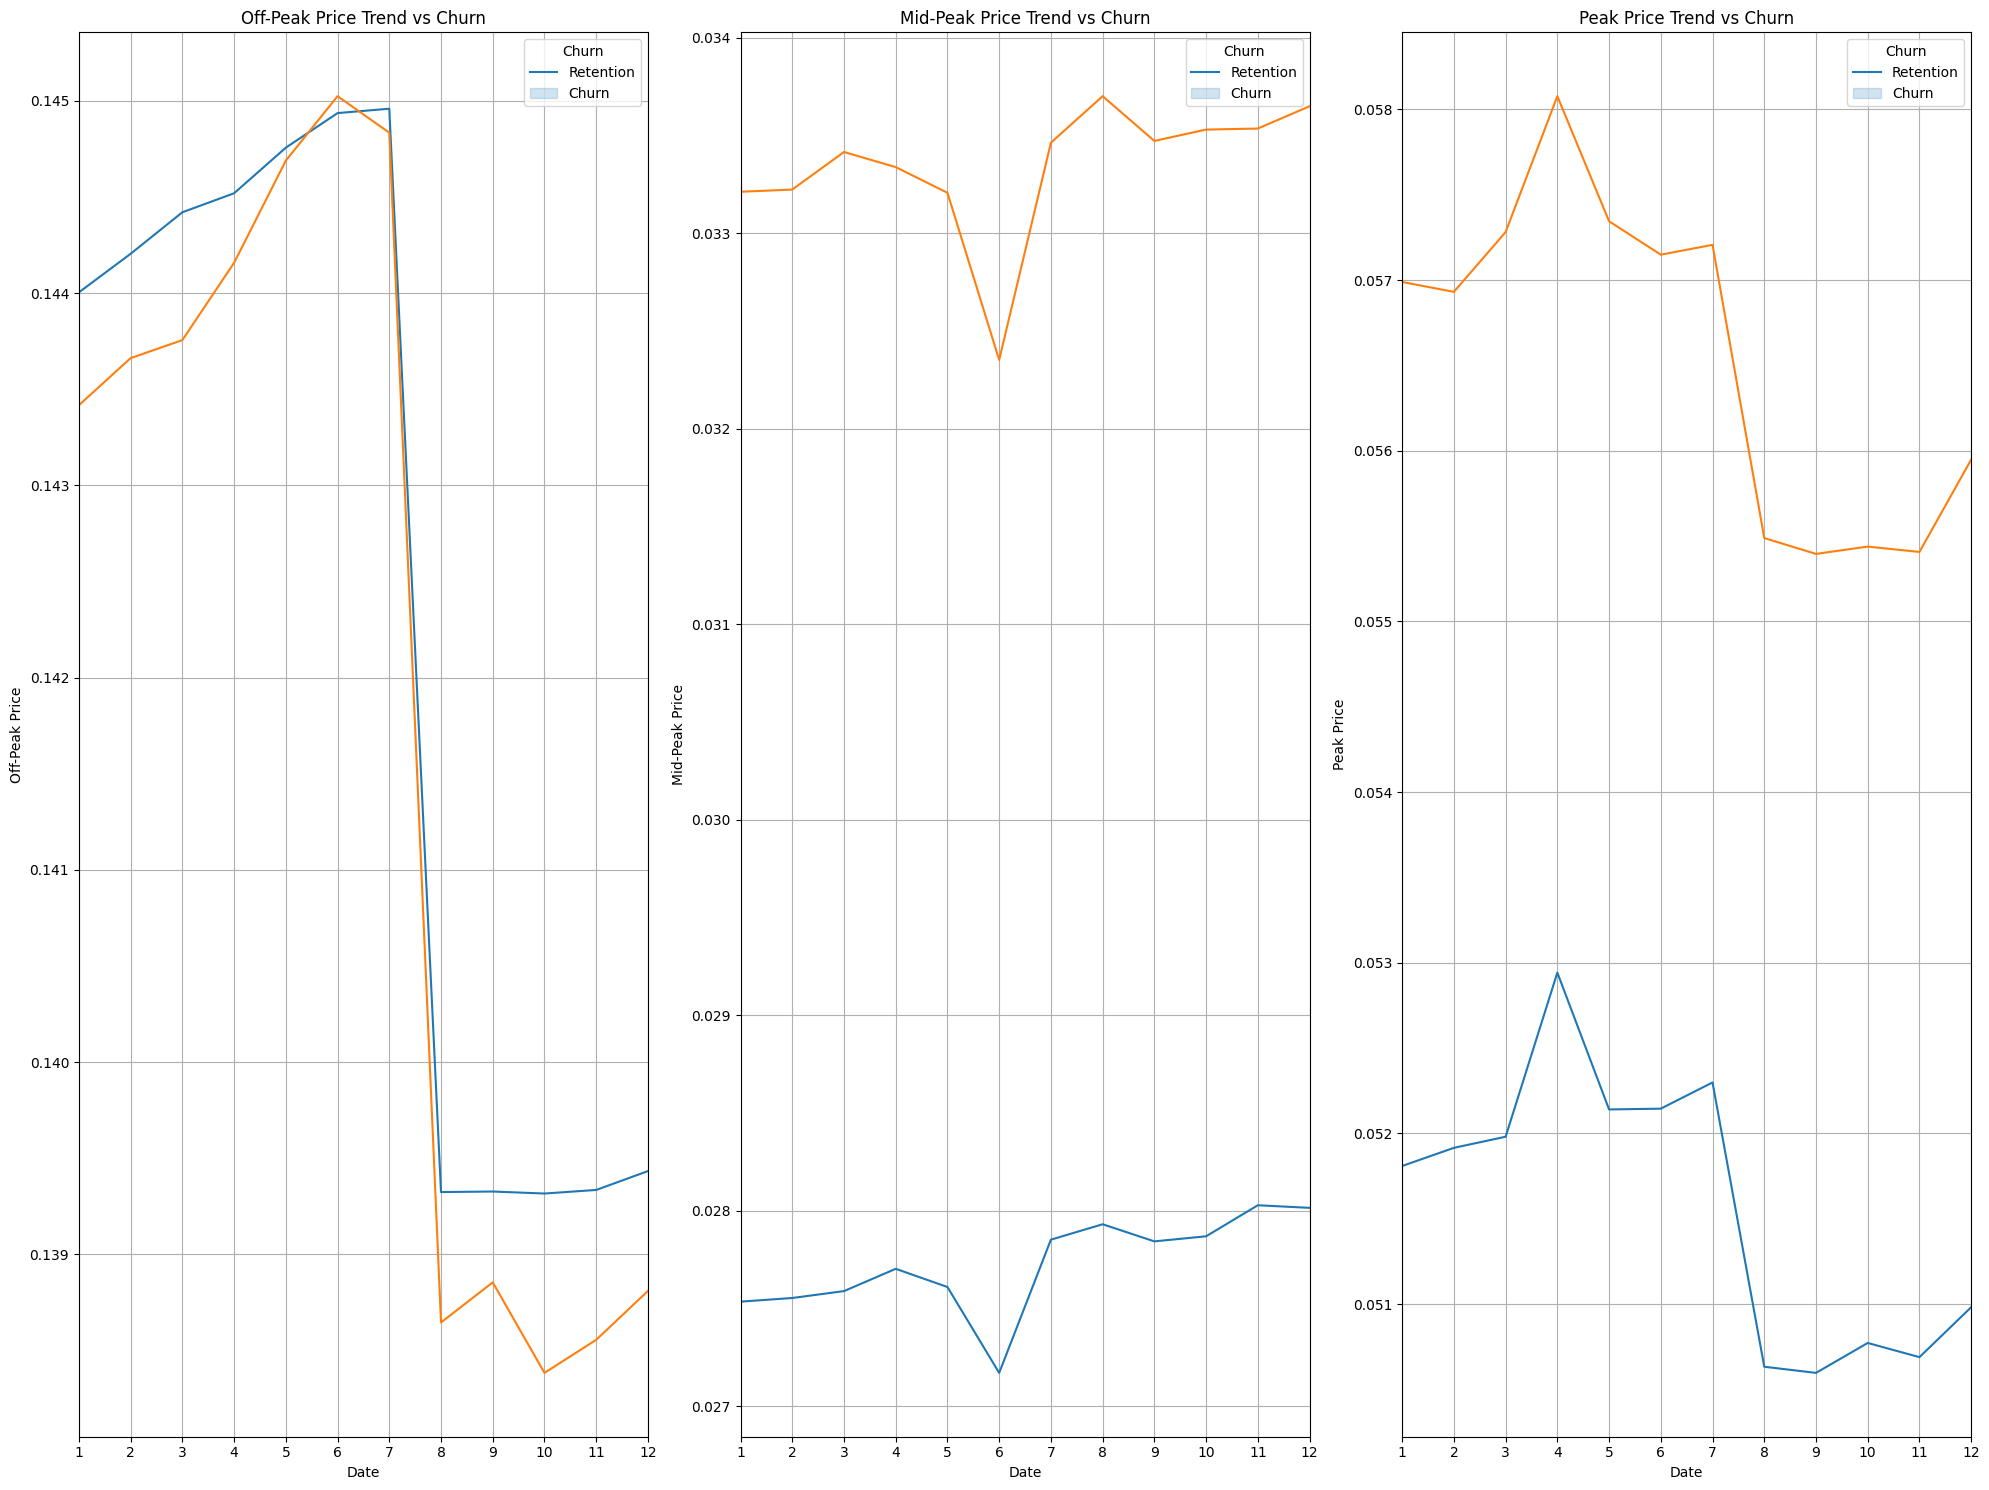

In [69]:
fig, ax = plt.subplots(figsize=(20, 15), nrows=1, ncols=3)

price_trends = data.groupby(['price_date', 'churn'])[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].mean().reset_index()

# Plot for Off-Peak Price
sns.lineplot(data=price_trends, x='price_date', y='price_off_peak_var', hue='churn', ax=ax[0],markers='o')
ax[0].set_title('Off-Peak Price Trend vs Churn')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Off-Peak Price')
ax[0].legend(title='Churn', labels=['Retention', 'Churn'])
ax[0].set_xlim(1,12)
ax[0].set_xticks(np.linspace(1, 12, 12)) 
ax[0].grid()

# Plot for Mid-Peak Price
sns.lineplot(data=price_trends, x='price_date', y='price_mid_peak_var', hue='churn', ax=ax[1],markers='o')
ax[1].set_title('Mid-Peak Price Trend vs Churn')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Mid-Peak Price')
ax[1].legend(title='Churn', labels=['Retention', 'Churn'])
ax[1].set_xlim(1,12)
ax[1].set_xticks(np.linspace(1, 12, 12)) 
ax[1].grid()


# Plot for Peak Price
sns.lineplot(data=price_trends, x='price_date', y='price_peak_var', hue='churn', ax=ax[2],markers='o')
ax[2].set_title('Peak Price Trend vs Churn')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Peak Price')
ax[2].legend(title='Churn', labels=['Retention', 'Churn'])
ax[2].set_xlim(1,12)
ax[2].set_xticks(np.linspace(1, 12, 12)) 
ax[2].grid()


plt.tight_layout()
plt.show()

During the mid-peak and peak season, high prices result in higher churn rates while in the off peak season, there is little effect on chrun regarding the prices.

##### CONSUMPTION

In [70]:
consumption = data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

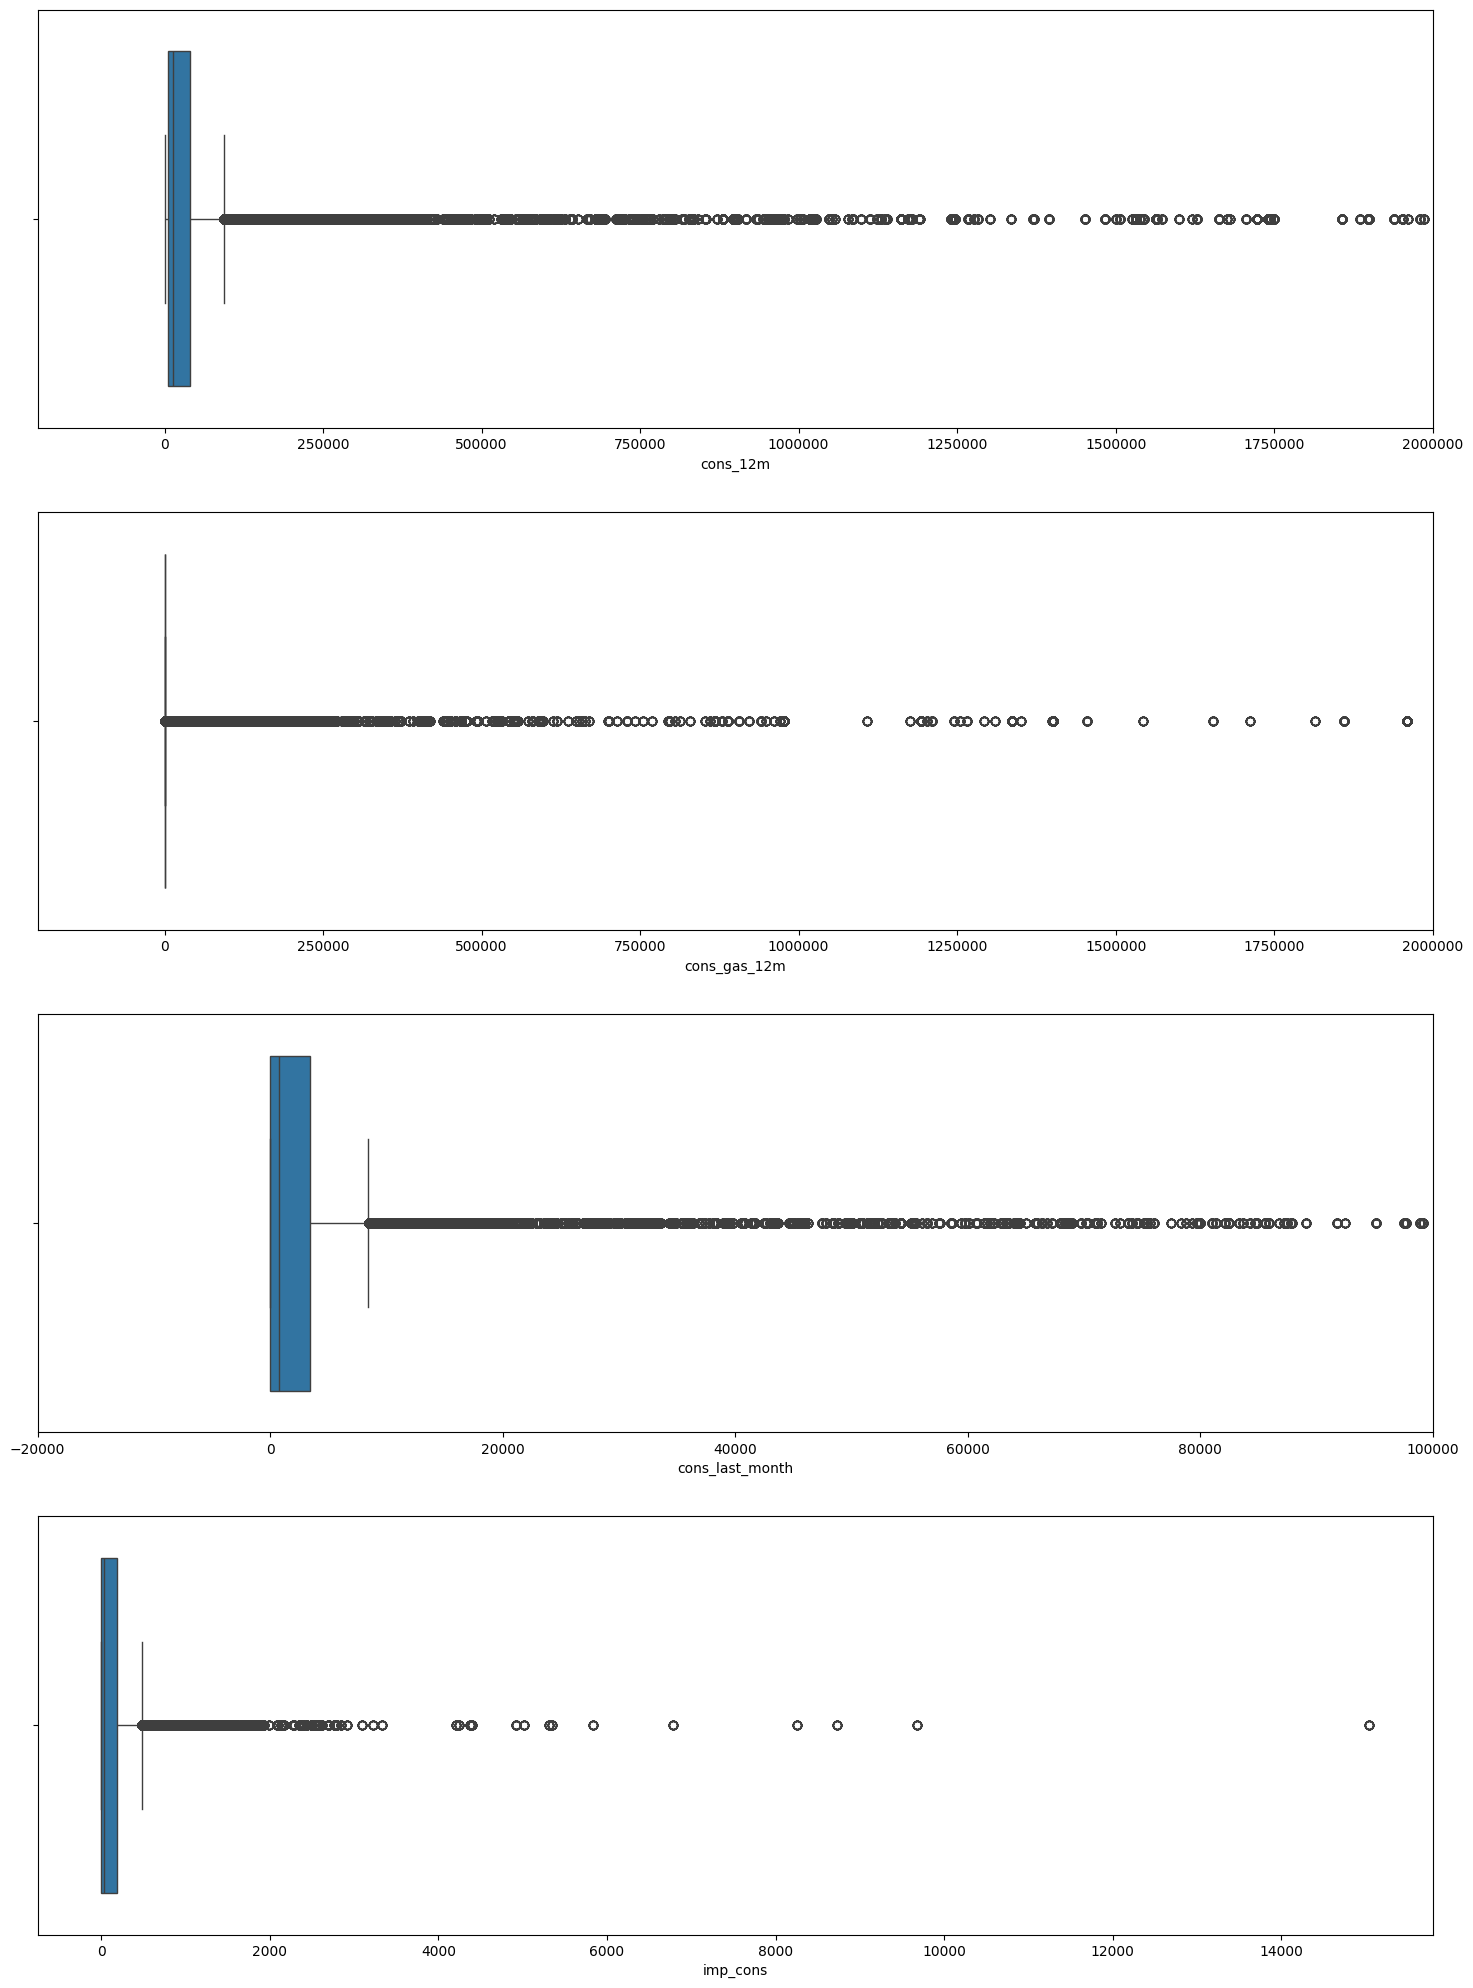

In [73]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

# Plot horizontal boxplots using orient='h'
sns.boxplot(x=consumption["cons_12m"], ax=axs[0], orient='h')
sns.boxplot(x=consumption["cons_gas_12m"], ax=axs[1], orient='h')
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2], orient='h')
sns.boxplot(x=consumption["imp_cons"], ax=axs[3], orient='h')

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')

# Set x-axis limits
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)

# Show plot
plt.show()


From this we can tell the consumption data is highly skewed due to the high number of outliers and minimal spread within the boxplots

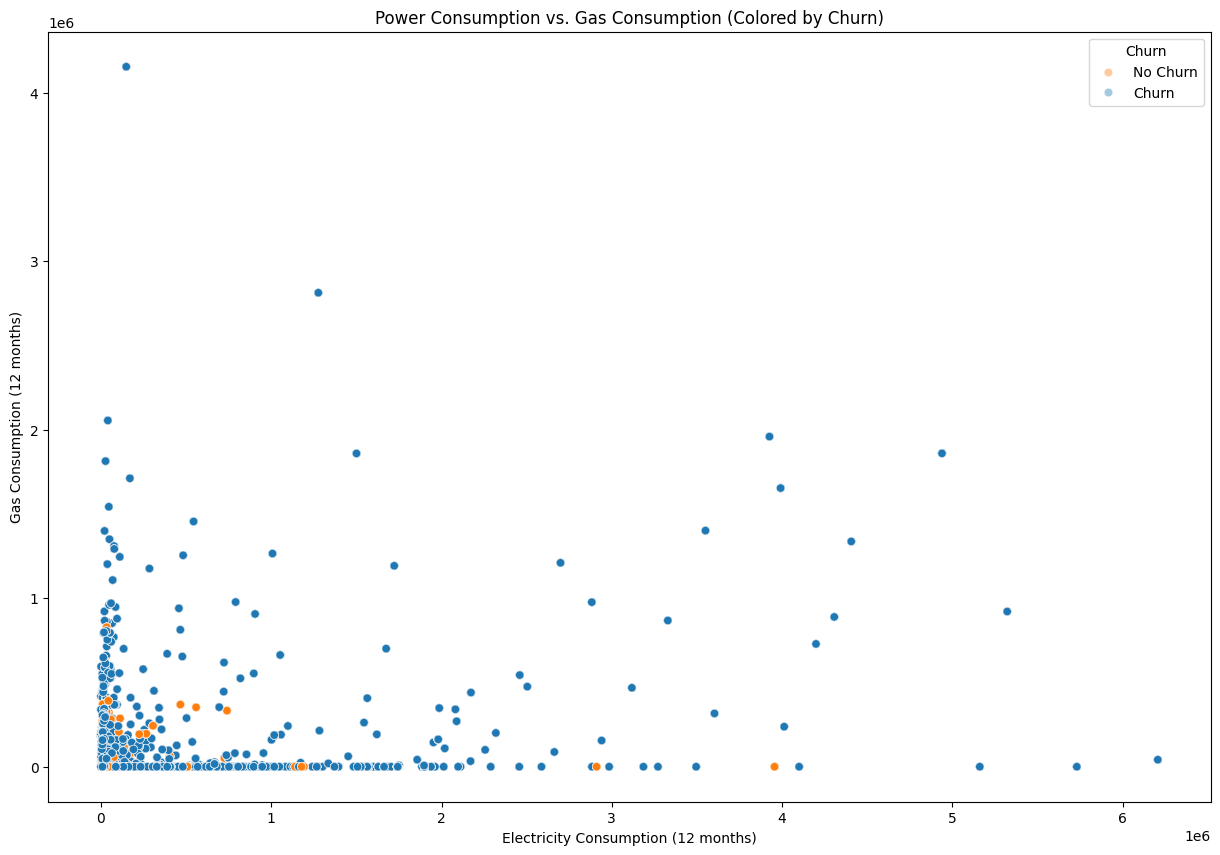

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x='cons_12m', y='cons_gas_12m', hue='churn', alpha=0.4)
plt.title('Power Consumption vs. Gas Consumption (Colored by Churn)')
plt.xlabel('Electricity Consumption (12 months)')
plt.ylabel('Gas Consumption (12 months)')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.show()

 Customer with low power and gas consumption are more likely to churn

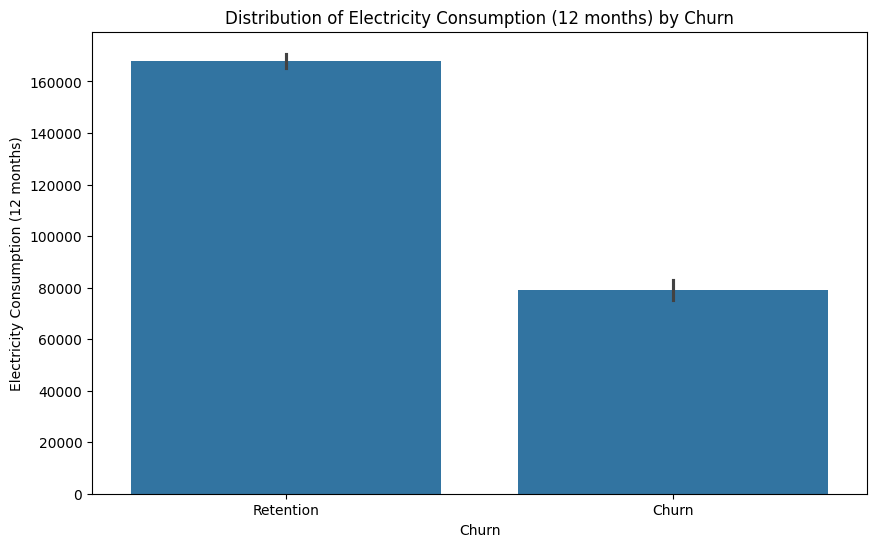

In [74]:
#Electricity consumption
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='churn', y='cons_12m')
plt.title('Distribution of Electricity Consumption (12 months) by Churn')
plt.xlabel('Churn')
plt.ylabel('Electricity Consumption (12 months)')
plt.xticks([0, 1], ['Retention', 'Churn'])
plt.show()

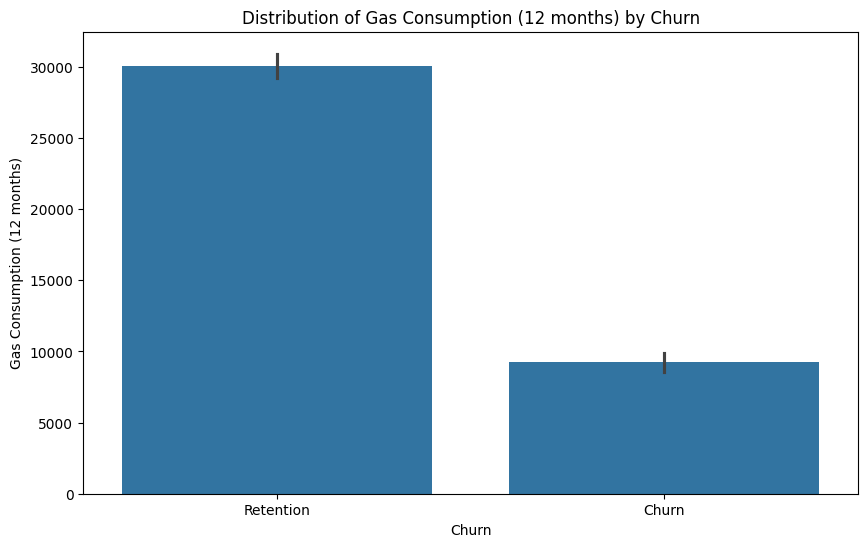

In [75]:
#Gas Consumption
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='churn', y='cons_gas_12m')
plt.title('Distribution of Gas Consumption (12 months) by Churn')
plt.xlabel('Churn')
plt.ylabel('Gas Consumption (12 months)')
plt.xticks([0, 1], ['Retention', 'Churn'])
plt.show()

 Low consumption is a higher likelihood for churn to occur

##### CONTRACT

In [23]:
data['date_activ'] = pd.to_datetime(data['date_activ'])
data['date_end'] = pd.to_datetime(data['date_end'])
data['date_modif_prod'] = pd.to_datetime(data['date_modif_prod'])
data['date_renewal'] = pd.to_datetime(data['date_modif_prod'])

In [24]:
data['contract'] = data['date_end'] - data['date_activ']

In [25]:
data['contract'].min()

Timedelta('731 days 00:00:00')

In [26]:
data['contract'].max()

Timedelta('4795 days 00:00:00')

In [27]:
data['contract'].nunique()

1410

In [28]:
data['contract'].median()

Timedelta('1829 days 00:00:00')

In [29]:
data['contract'] = data['contract'].dt.days

In [30]:
data['high_contract'] = data['contract'].apply(lambda x: x > 1829)
data['low_contract'] = data['contract'].apply(lambda x: x < 1829)


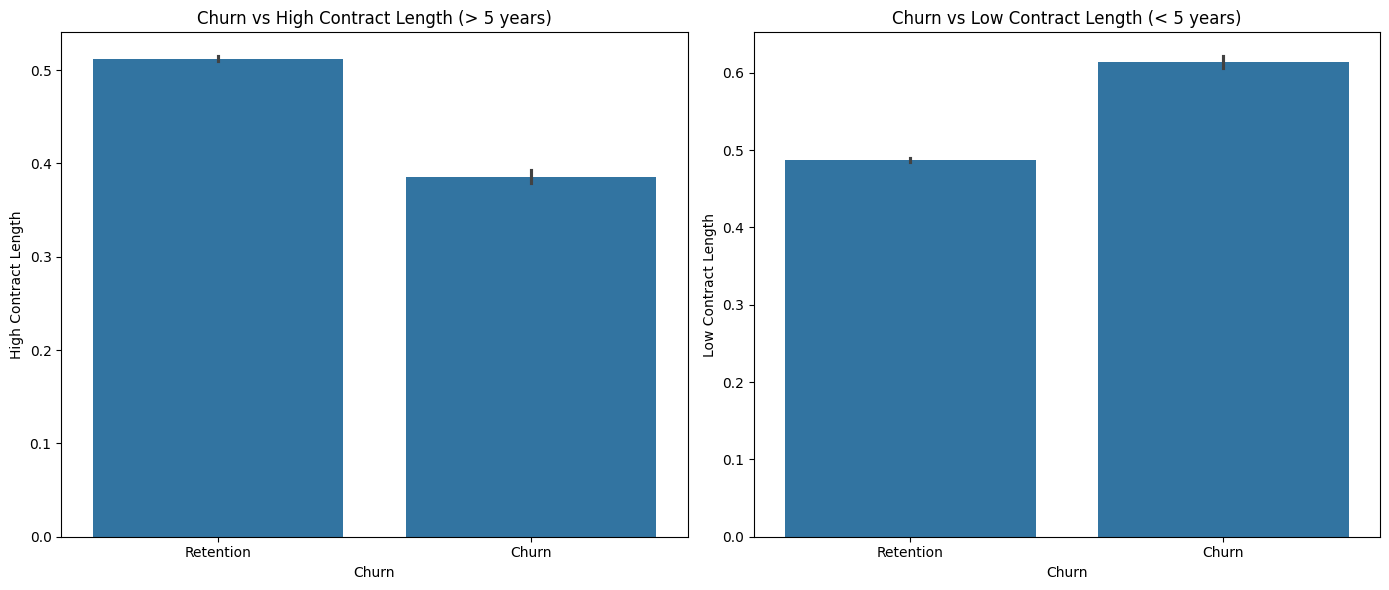

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for high_contract vs churn
sns.barplot(y='high_contract', x='churn', data=data, ax=ax[0])
ax[0].set_title('Churn vs High Contract Length (> 5 years)')
ax[0].set_xlabel('Churn')
ax[0].set_ylabel('High Contract Length')
ax[0].set_xticks([0, 1], ['Retention', 'Churn'])



# Plot for low_contract vs churn
sns.barplot(y='low_contract', x='churn', data=data, ax=ax[1])
ax[1].set_title('Churn vs Low Contract Length (< 5 years)')
ax[1].set_xlabel('Churn')
ax[1].set_ylabel('Low Contract Length')
ax[1].set_xticks([0, 1], ['Retention', 'Churn'])


plt.tight_layout()
plt.show()

Customers with low contract periods that are less than 5 years have a higher churn rate as compared to customers with contracts periods that are more than 5 years

##### CONTRACT TYPE (if a customer has both gas and electricity)

In [77]:
contract_type = data[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract

churn,0,1
has_gas,,
0,128965,14399
1,29181,2604


In [78]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)
contract_percentage

churn,0,1
has_gas,,
0,89.956335,10.043665
1,91.807456,8.192544


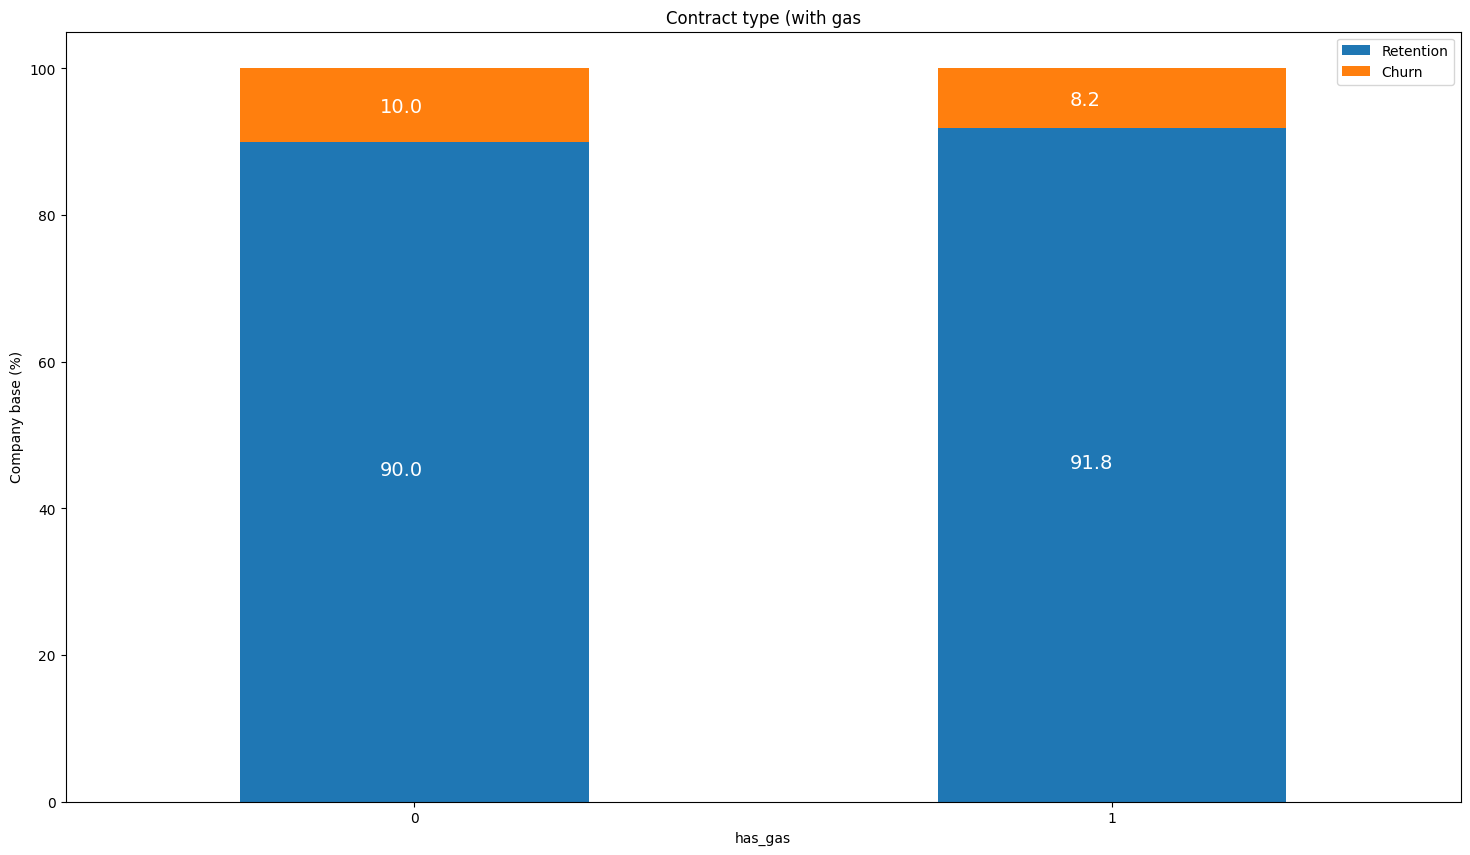

In [79]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

Customers that have both gas and electricity have a lower churn rate than those who do not have gas

##### MARGIN

In [84]:
margin = data[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

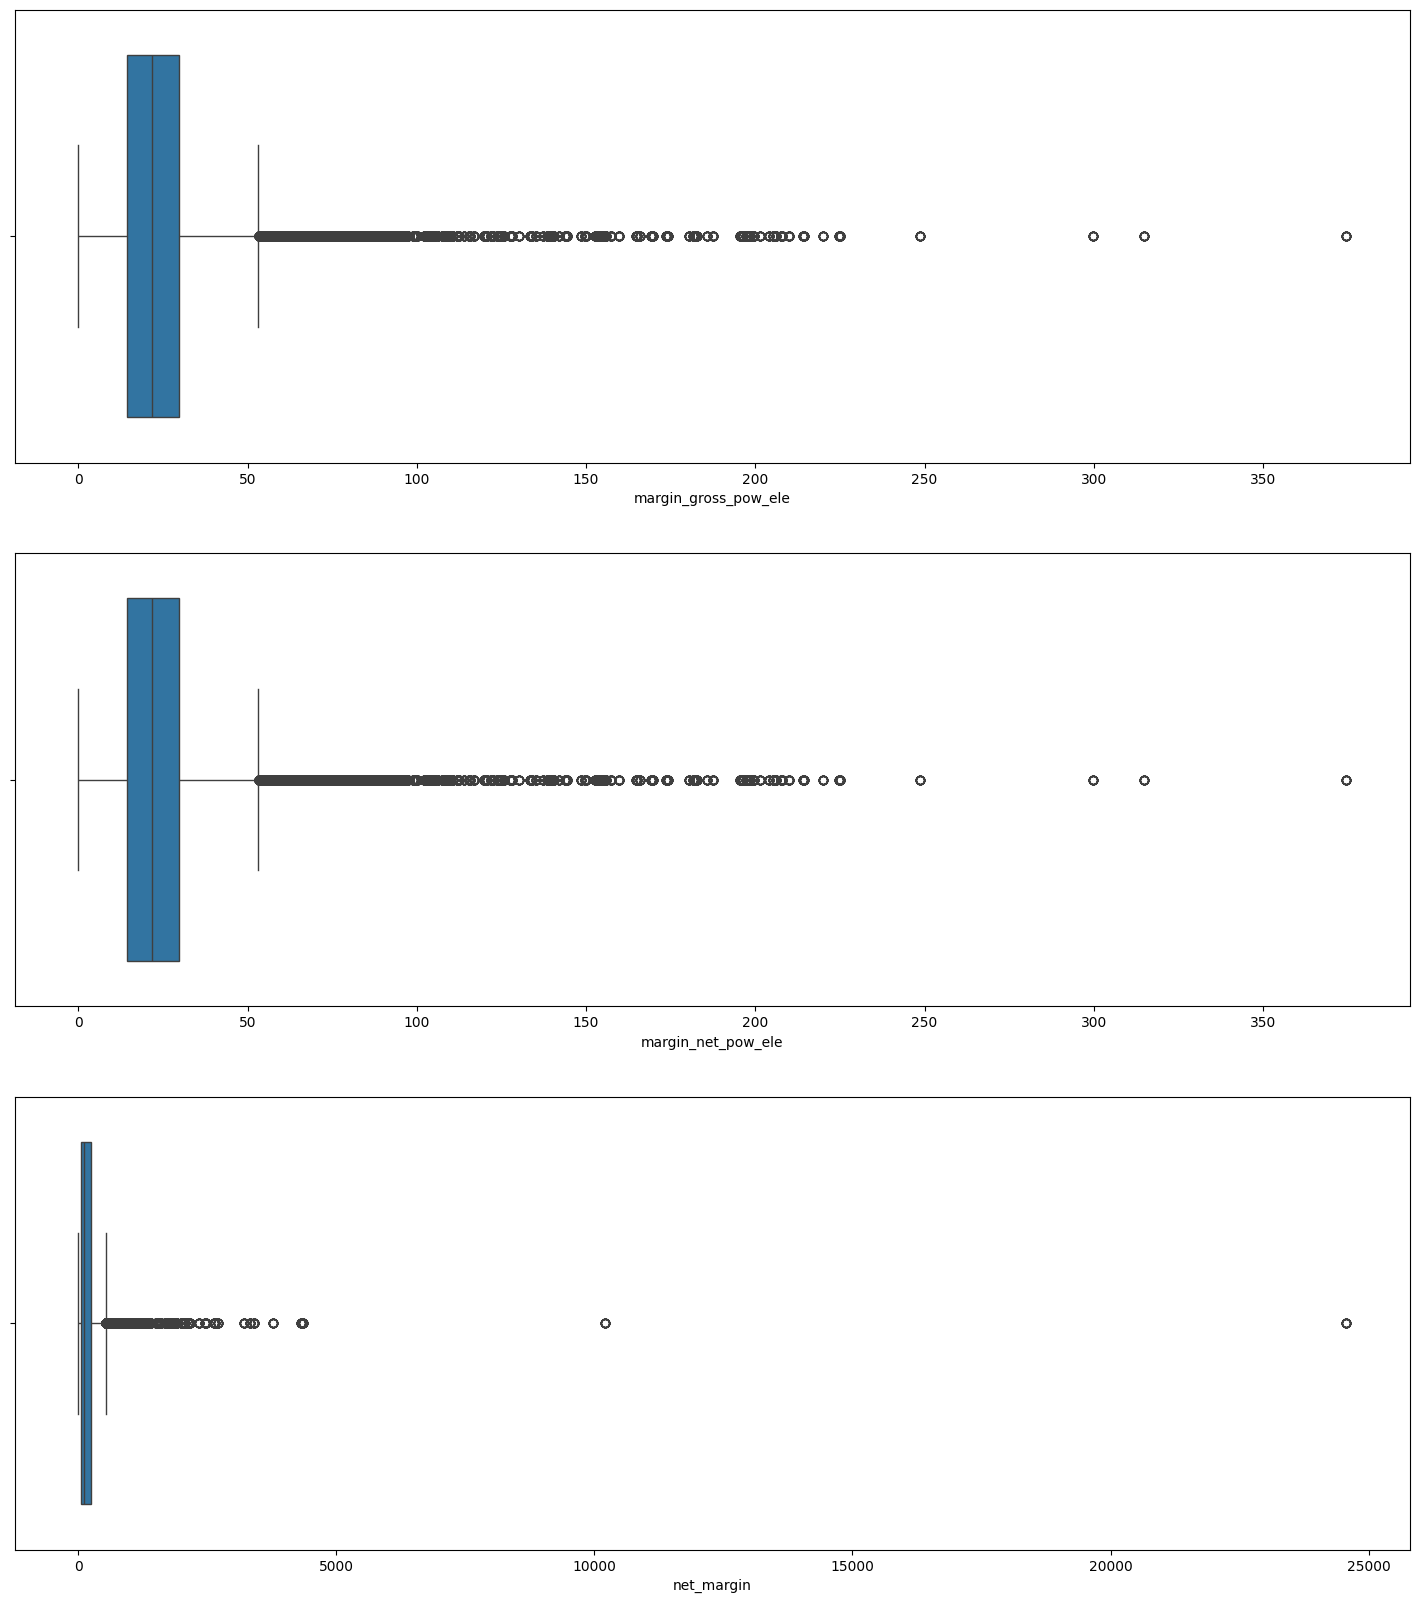

In [86]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0],orient='h')
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1],orient='h')
sns.boxplot(margin["net_margin"], ax=axs[2],orient='h')

# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

There is a significant number of outliers

##### TENURE

In [33]:
data['num_years_antig'].nunique()

13

In [34]:
data['num_years_antig'].value_counts()

num_years_antig
6     57205
4     47735
3     29162
5     27790
7      6108
11     2219
12     1320
8      1234
9      1104
10      972
13      156
2       132
1        12
Name: count, dtype: int64

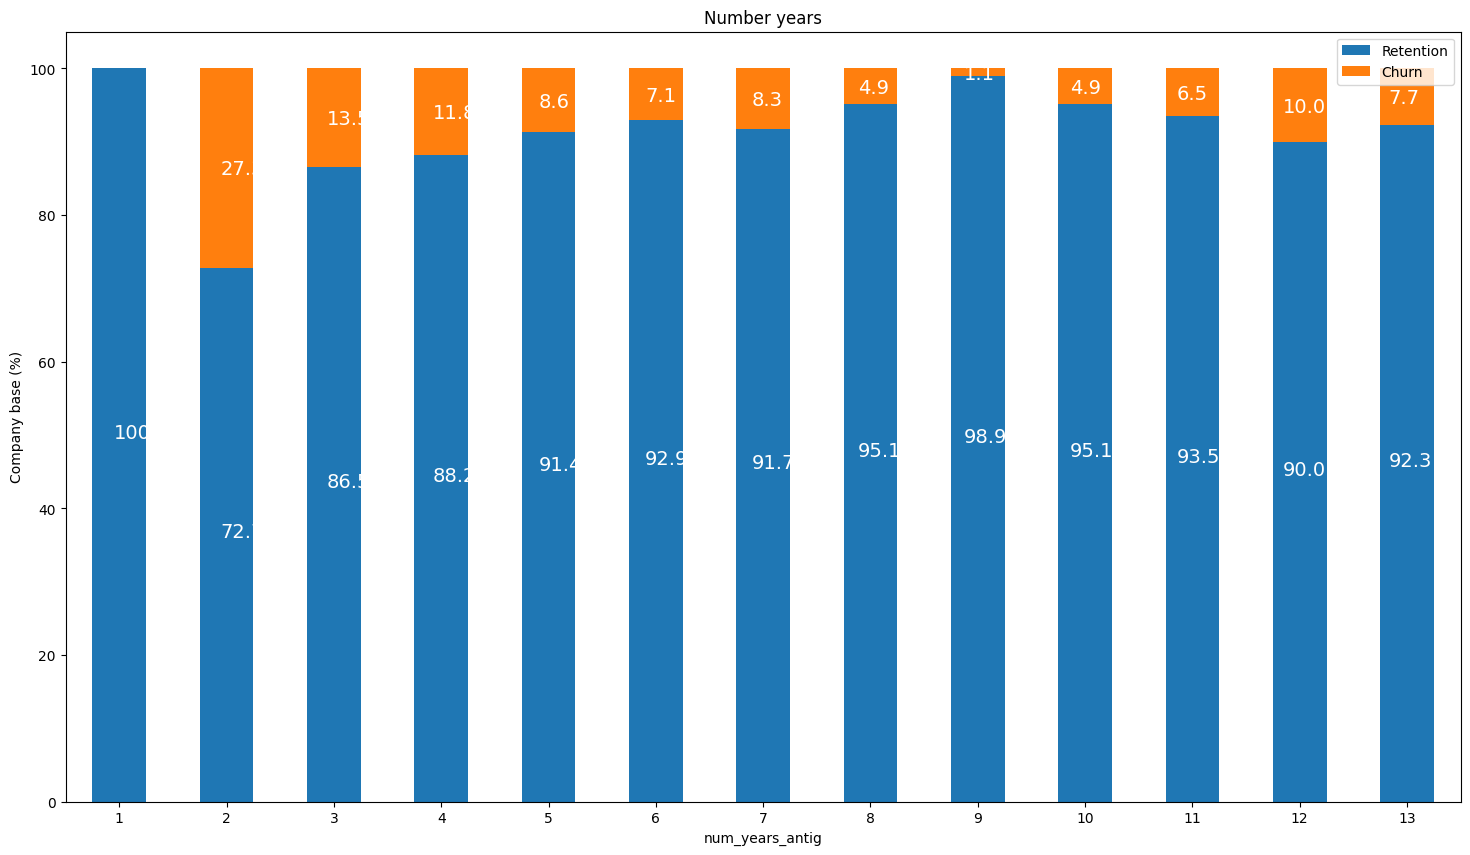

In [80]:
years_antig = data.groupby([data["num_years_antig"],data["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

Customers who have recently switched to PowerCo and have a tenure of a year have the zero churn rate

##### NUMBER OF ACTIVE PRODUCTS

In [81]:

products = data.groupby([data["nb_prod_act"],data["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

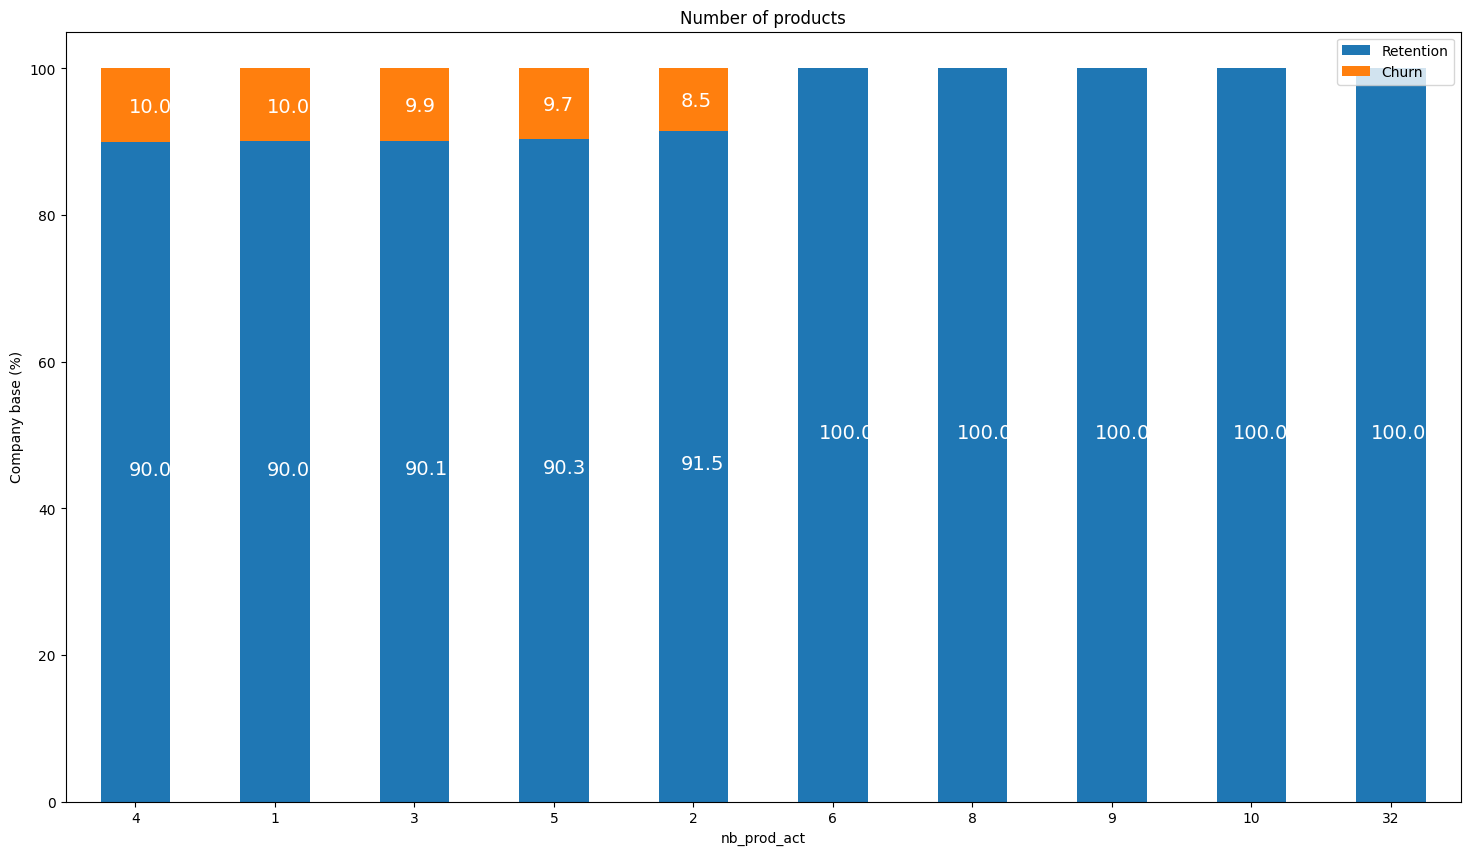

In [82]:
plot_stacked_bars(products_percentage, "Number of products")

Customers with more than 5 active products have a zero churn rate. Hence the more the number of active products a customer has the less likely they are to churn

##### ORIGIN CAMPAIGN

In [40]:
data['origin_up'].nunique()

6

In [41]:
data['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    85086
kamkkxfxxuwbdslkwifmmcsiusiuosws    51503
ldkssxwpmemidmecebumciepifcamkci    37757
MISSING                               767
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: count, dtype: int64

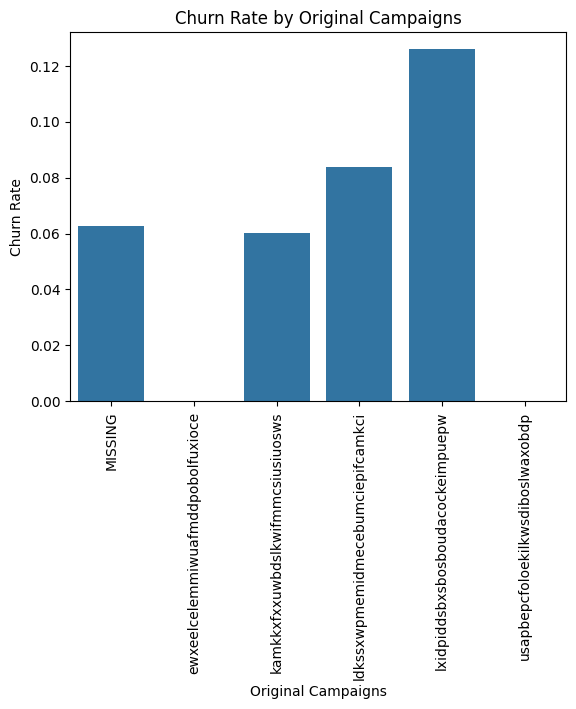

In [42]:
# Calculate the churn rate per sales channel
churn_rate = data.groupby('origin_up')['churn'].mean().reset_index()

# Plotting the churn rate
sns.barplot(x='origin_up', y='churn', data=churn_rate)
plt.title('Churn Rate by Original Campaigns')
plt.xlabel('Original Campaigns')
plt.ylabel('Churn Rate')
plt.xticks(rotation=90)
plt.show()

There are original campaigns that have more churn rate and some that have zero churn rate

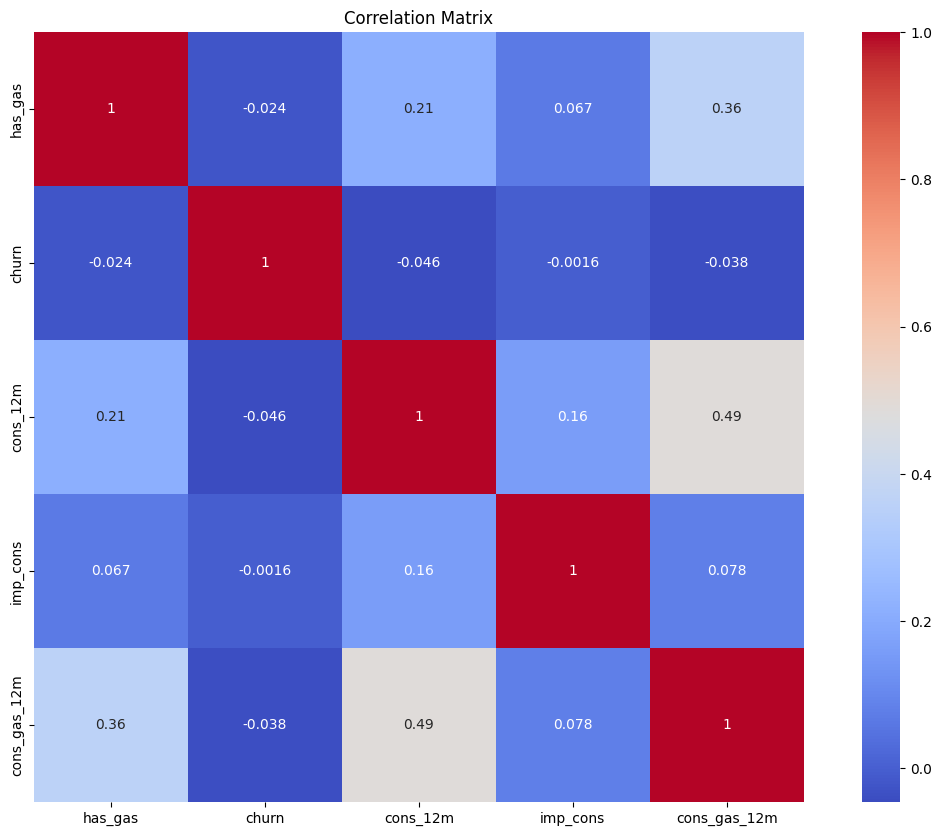

In [83]:
corr_matrix = data[["has_gas", "churn","cons_12m", "imp_cons","cons_gas_12m"]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

There is little correlation between whether a customer has gas or not and the likelihood to churn. However there is a high correlation  between the consumption of gas and the conusmption of electricity in th last 12 months

#### FORECAST

In [87]:
def plot_distribution(dataframe, column, ax, bins_=50):
   
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

In [88]:
forecast = data[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

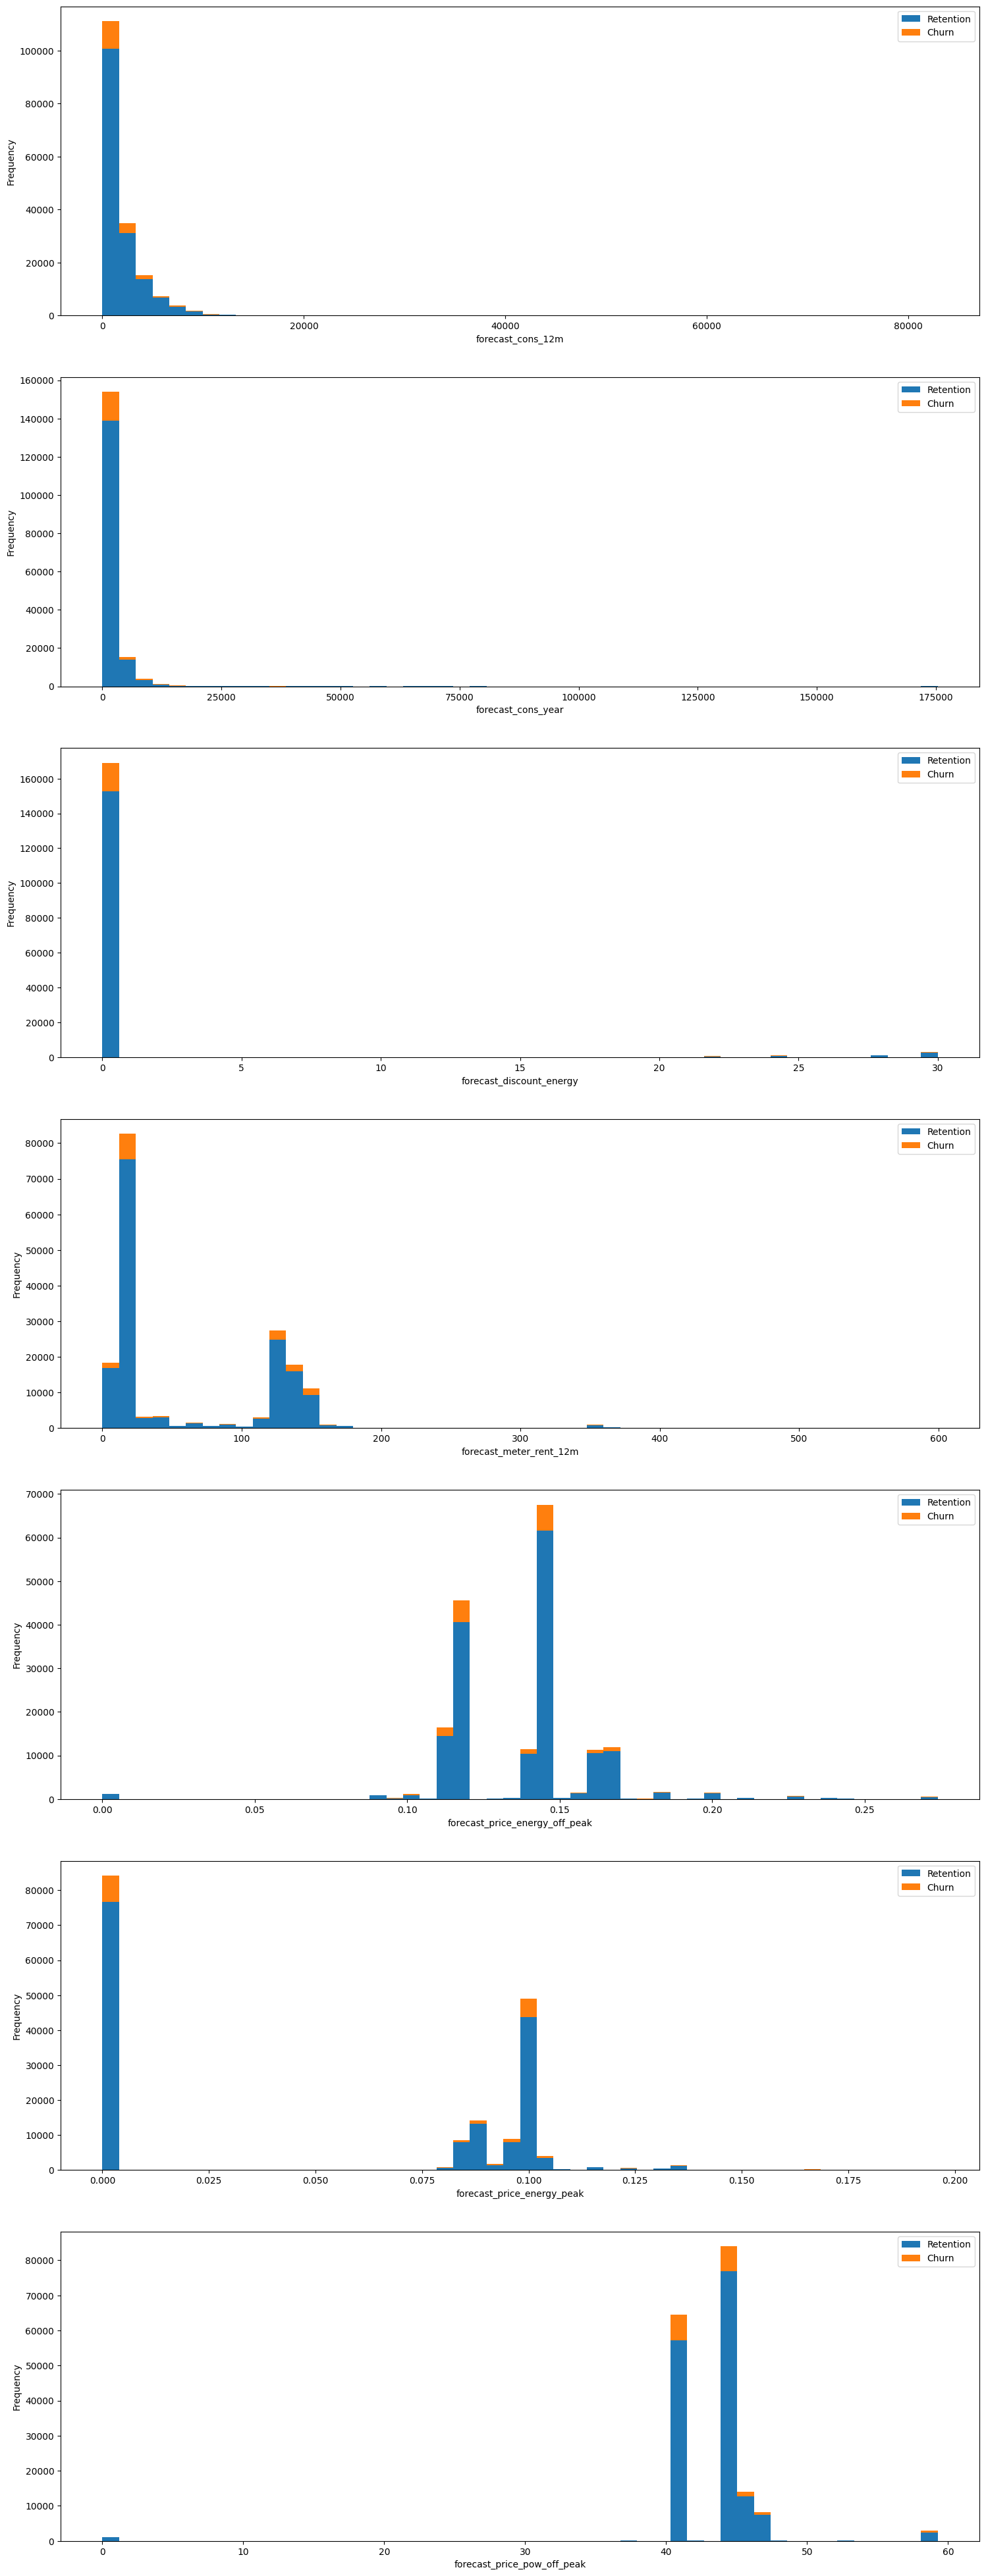

In [89]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(forecast, "forecast_cons_12m", axs[0])
plot_distribution(forecast, "forecast_cons_year", axs[1])
plot_distribution(forecast, "forecast_discount_energy", axs[2])
plot_distribution(forecast, "forecast_meter_rent_12m", axs[3])
plot_distribution(forecast, "forecast_price_energy_off_peak", axs[4])
plot_distribution(forecast, "forecast_price_energy_peak", axs[5])
plot_distribution(forecast, "forecast_price_pow_off_peak", axs[6])

This data is highly skewed

In [90]:
data.to_csv('data.csv',index=False)